In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
pal = sns.color_palette("Set1")
red_color = pal[0]
green_color = pal[2]

In [2]:
import FlowCytometryTools # http://gorelab.bitbucket.org/flowcytometrytools/

In [3]:
well = '03'
datafile=r"D:/Google Drive/ex silico/flow/competition/2015-05-18/MB2015-05-18_calibration_D1-10_no8.0%s.fcs" % well
print datafile
sample = FlowCytometryTools.FCMeasurement(ID="ROW_D_TS", datafile=datafile)

print sample.meta['$DATE']
print sample.meta['$SYS'], sample.meta['$OP']
print "Cell count", sample.meta['$TOT']

D:/Google Drive/ex silico/flow/competition/2015-05-18/MB2015-05-18_calibration_D1-10_no8.003.fcs
2015-May-18
MACSQuantify,2.5.1345.9863 Maayan Bibi
Cell count 20000


In [4]:
print sample.meta['$DATE']
print sample.meta['$SYS'], sample.meta['$OP']
print "Cell count", sample.meta['$TOT']
print sample.channel_names

2015-May-18
MACSQuantify,2.5.1345.9863 Maayan Bibi
Cell count 20000
('HDR-T', 'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'VioGreen-A', 'VioGreen-H', 'VioGreen-W', 'dsRed/txRed-A', 'dsRed/txRed-H', 'dsRed/txRed-W')


### Forward and Side Scatter

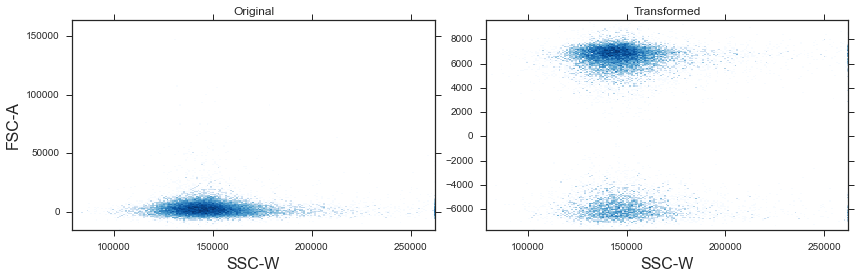

In [5]:
scatter_b = 1
tsample = sample.transform('hlog', b=scatter_b,  channels=['FSC-A'])

fig,ax = plt.subplots(1, 2, figsize=(12,4))
sample.plot(['SSC-W', 'FSC-A'], cmap="Blues", ax=ax[0]);
tsample.plot(['SSC-W', 'FSC-A'], cmap="Blues", ax=ax[1])
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

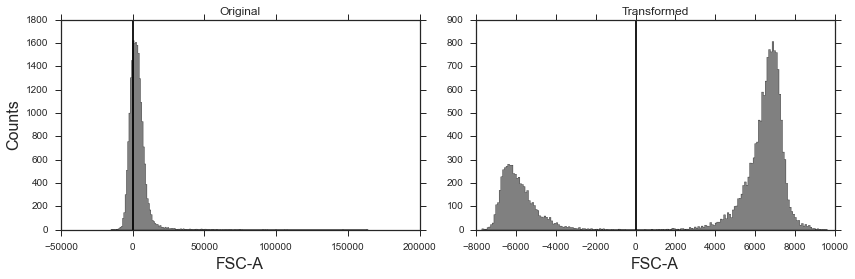

In [6]:
scatter_thgate = FlowCytometryTools.ThresholdGate(0.0, 'FSC-A', region='above')

fig,ax = plt.subplots(1, 2, figsize=(12,4))
sample.plot('FSC-A', gates=scatter_thgate,  ax=ax[0], gate_colors='k');
tsample.plot('FSC-A', gates=scatter_thgate, ax=ax[1], gate_colors='k')
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

In: 14456
Out: 5544


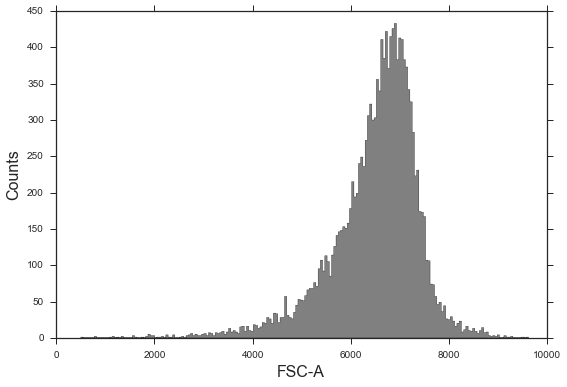

In [7]:
gsample = tsample.gate(scatter_thgate)
gsample.plot('FSC-A')
plt.tight_layout()

print "In:", gsample.counts
print "Out:", tsample.gate(~scatter_thgate).counts

### Flourescence

In [42]:
green = 'VioGreen-H'# 'VioGreen-A', 'VioGreen-H',
red =  'dsRed/txRed-H'#, 'dsRed/txRed-H', 'dsRed/txRed-W'
print well

03


In [9]:
ridx = gsample.data[red] < 0
print (ridx).mean()

gidx = gsample.data[green] < 0
print (gidx).mean()

6.91754288877e-05
0.0


In [10]:
gsample.data[red][ridx] = 0
ridx = gsample.data[red] < 0
print (ridx).sum()

gsample.data[green][gidx] = 0
gidx = gsample.data[green] < 0
print (gidx).sum()

D:\workspace\curveball_project\python\venv\lib\site-packages\pandas\core\generic.py:3394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\workspace\curveball_project\python\venv\lib\site-packages\IPython\core\interactiveshell.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0
0


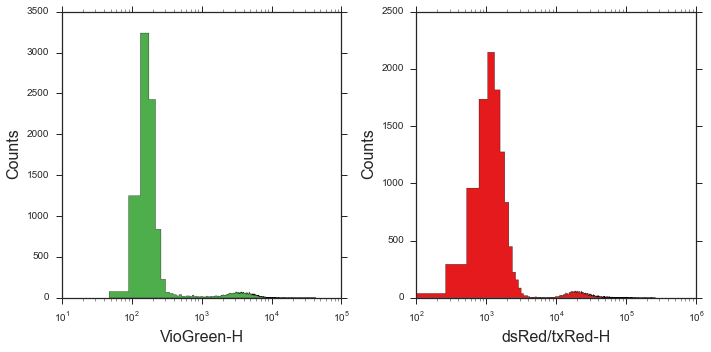

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
gsample.plot(green, ax=ax[0], color=green_color, bins=1000)
gsample.plot(red, ax=ax[1], color=red_color, bins=1000)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
fig.tight_layout()

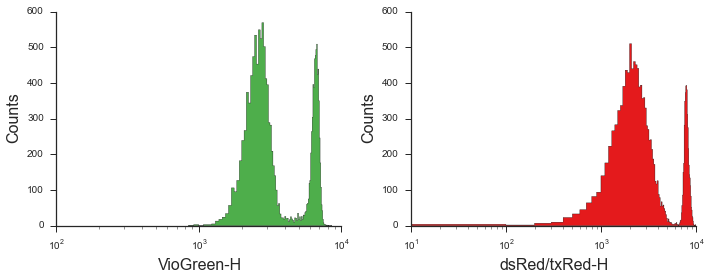

In [12]:
green_b = 1e2
red_b = 1e3
tsample = gsample.transform('hlog', b=green_b,  channels=[green]).transform('hlog', b=red_b, channels=[red])

fig,ax = plt.subplots(1,2,figsize=(10,4))
tsample.plot(green, ax=ax[0], color=green_color, bins=100)
tsample.plot(red, ax=ax[1], color=red_color, bins=100)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
fig.tight_layout()
sns.despine()

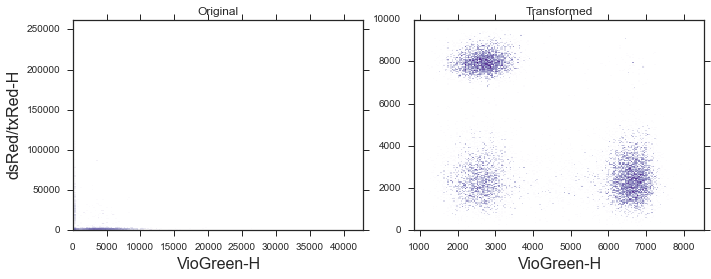

In [13]:
fig,ax = plt.subplots(1, 2, figsize=(10,4))
gsample.plot([green, red], cmap="Purples", ax=ax[0]);
tsample.plot([green, red], cmap="Purples", ax=ax[1])
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

In [14]:
green_th = 4500
red_th = 6500

green_thgate = FlowCytometryTools.ThresholdGate(green_th, green, region='above')
red_thgate = FlowCytometryTools.ThresholdGate(red_th, red, region='above')

green_gate = FlowCytometryTools.core.gates.QuadGate([green_th, red_th], [green, red], 'bottom right', 'green')
red_gate = FlowCytometryTools.core.gates.QuadGate([green_th, red_th], [green, red], 'top left', 'red')

green: 0.589743589744
red: 0.410256410256


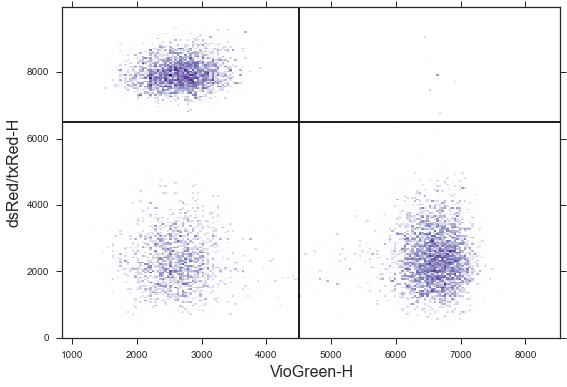

In [15]:
tsample.plot([green, red], gates=[green_gate, red_gate], gate_colors='k', cmap="Purples")
plt.tight_layout()

green_count = tsample.gate(green_gate).counts
red_count = tsample.gate(red_gate).counts
print "green:", green_count / float(green_count+red_count)
print "red:", red_count / float(green_count+red_count)

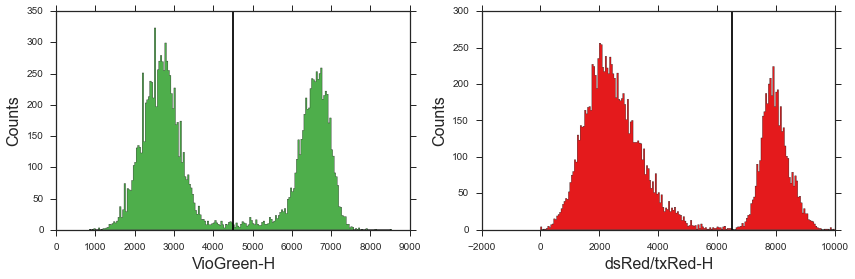

In [16]:
fig,ax = plt.subplots(1, 2, figsize=(12,4))
tsample.plot(green, gates=[green_thgate], color=green_color, gate_colors='k', ax=ax[0])
tsample.plot(red, gates=[red_thgate], color=red_color, gate_colors='k', ax=ax[1])
fig.tight_layout()

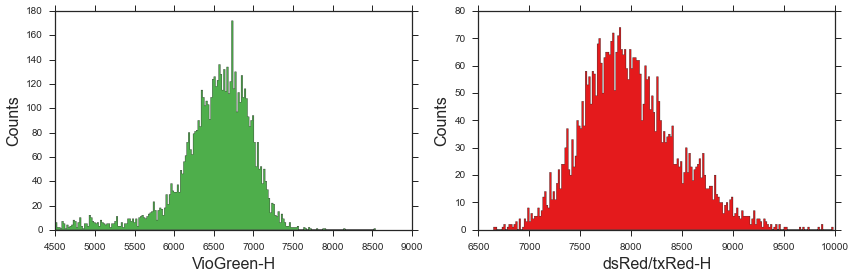

In [17]:
gated_green = tsample.gate(green_gate)
gated_red = tsample.gate(red_gate)

fig,ax = plt.subplots(1, 2, figsize=(12,4))
gated_green.plot(green, color=green_color, ax=ax[0])
gated_red.plot(red, color=red_color, ax=ax[1])
fig.tight_layout()

## Plate - calibration

In [18]:
datadir = r"D:/Google Drive/ex silico/flow/competition/2015-05-18/"
print datadir
plate = FlowCytometryTools.FCPlate.from_dir(ID='calibration', path=datadir, parser='number_col',
                                            pattern='MB2015-05-18_calibration_D1-10_no8.*.fcs')
plate = plate.dropna()
print plate

D:/Google Drive/ex silico/flow/competition/2015-05-18/
ID:
calibration

Data:
   1  2  3  4  5  6  7  8  9
A  1  2  3  4  5  6  7  8  9


In [19]:
plate = plate.transform('hlog', b=scatter_b,  channels=['FSC-A'])
plate = plate.gate(scatter_thgate)
plate = plate.transform('hlog', b=green_b, channels=[green])
plate = plate.transform('hlog', b=red_b,  channels=[red])

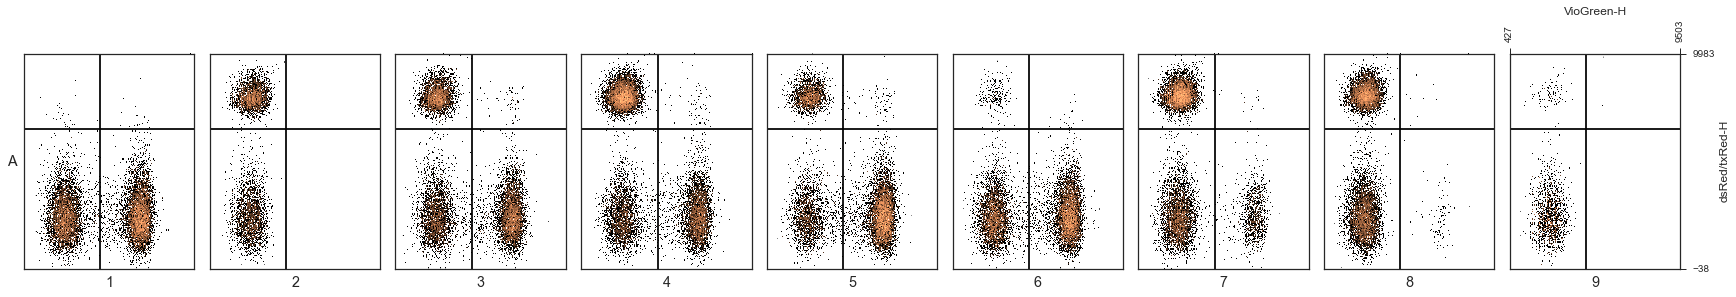

In [20]:
width = 24
height = int(width * 2/12.)

main_ax, ax = plate.plot([green, red], gates=[green_gate, red_gate], gate_colors='k')#, cmap="BuGn")
fig = main_ax.figure
fig.set_size_inches(width, height)
fig.tight_layout()

In [21]:
counts = pd.concat((plate.gate(green_gate).counts(), plate.gate(red_gate).counts()))
counts.index = ['green', 'red']
counts = counts/counts.sum(axis=0)
counts

,1,2,3,4,5,6,7,8,9
green,0.996642,0,0.589744,0.418468,0.740802,0.957248,0.167594,0.016265,0.004167
red,0.003358,1,0.410256,0.581532,0.259198,0.042752,0.832406,0.983735,0.995833


In [22]:
from GoreUtilities import plot_heat_map

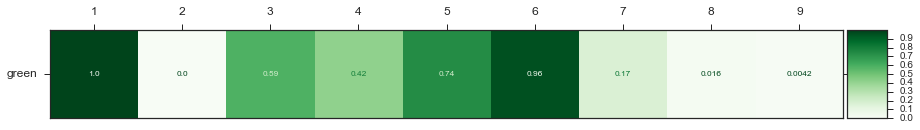

In [23]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax = plot_heat_map(counts[counts.index=='green'], include_values=True, show_colorbar=True, cmap="Greens", ax=ax)

## Plate - competition

In [24]:
datadir = r"D:/Google Drive/ex silico/flow/competition/2015-05-19/"
print datadir
plate = FlowCytometryTools.FCPlate.from_dir(ID='F_ROW_TS', path=datadir, parser='number',
                                            pattern='MB2015-05-19_F_ROW_TS.*.fcs')
plate = plate.dropna()
plate.data.pop(1)
plate.data.pop(2)
plate.data.pop(3)
print plate

D:/Google Drive/ex silico/flow/competition/2015-05-19/
ID:
F_ROW_TS

Data:
  1   2   3   4   5   6   7   8   9   10  11  12
A      9  17  25  33  41  49  57  65  73  81  89
B     10  18  26  34  42  50  58  66  74  82  90
C     11  19  27  35  43  51  59  67  75  83  91
D  4  12  20  28  36  44  52  60  68  76  84  92
E  5  13  21  29  37  45  53  61  69  77  85  93
F  6  14  22  30  38  46  54  62  70  78  86  94
G  7  15  23  31  39  47  55  63  71  79  87  95
H  8  16  24  32  40  48  56  64  72  80  88  96


In [25]:
plate = plate.transform('hlog', b=scatter_b,  channels=['FSC-A'])
plate = plate.gate(scatter_thgate)
plate = plate.transform('hlog', b=green_b, channels=[green])
plate = plate.transform('hlog', b=red_b,  channels=[red])

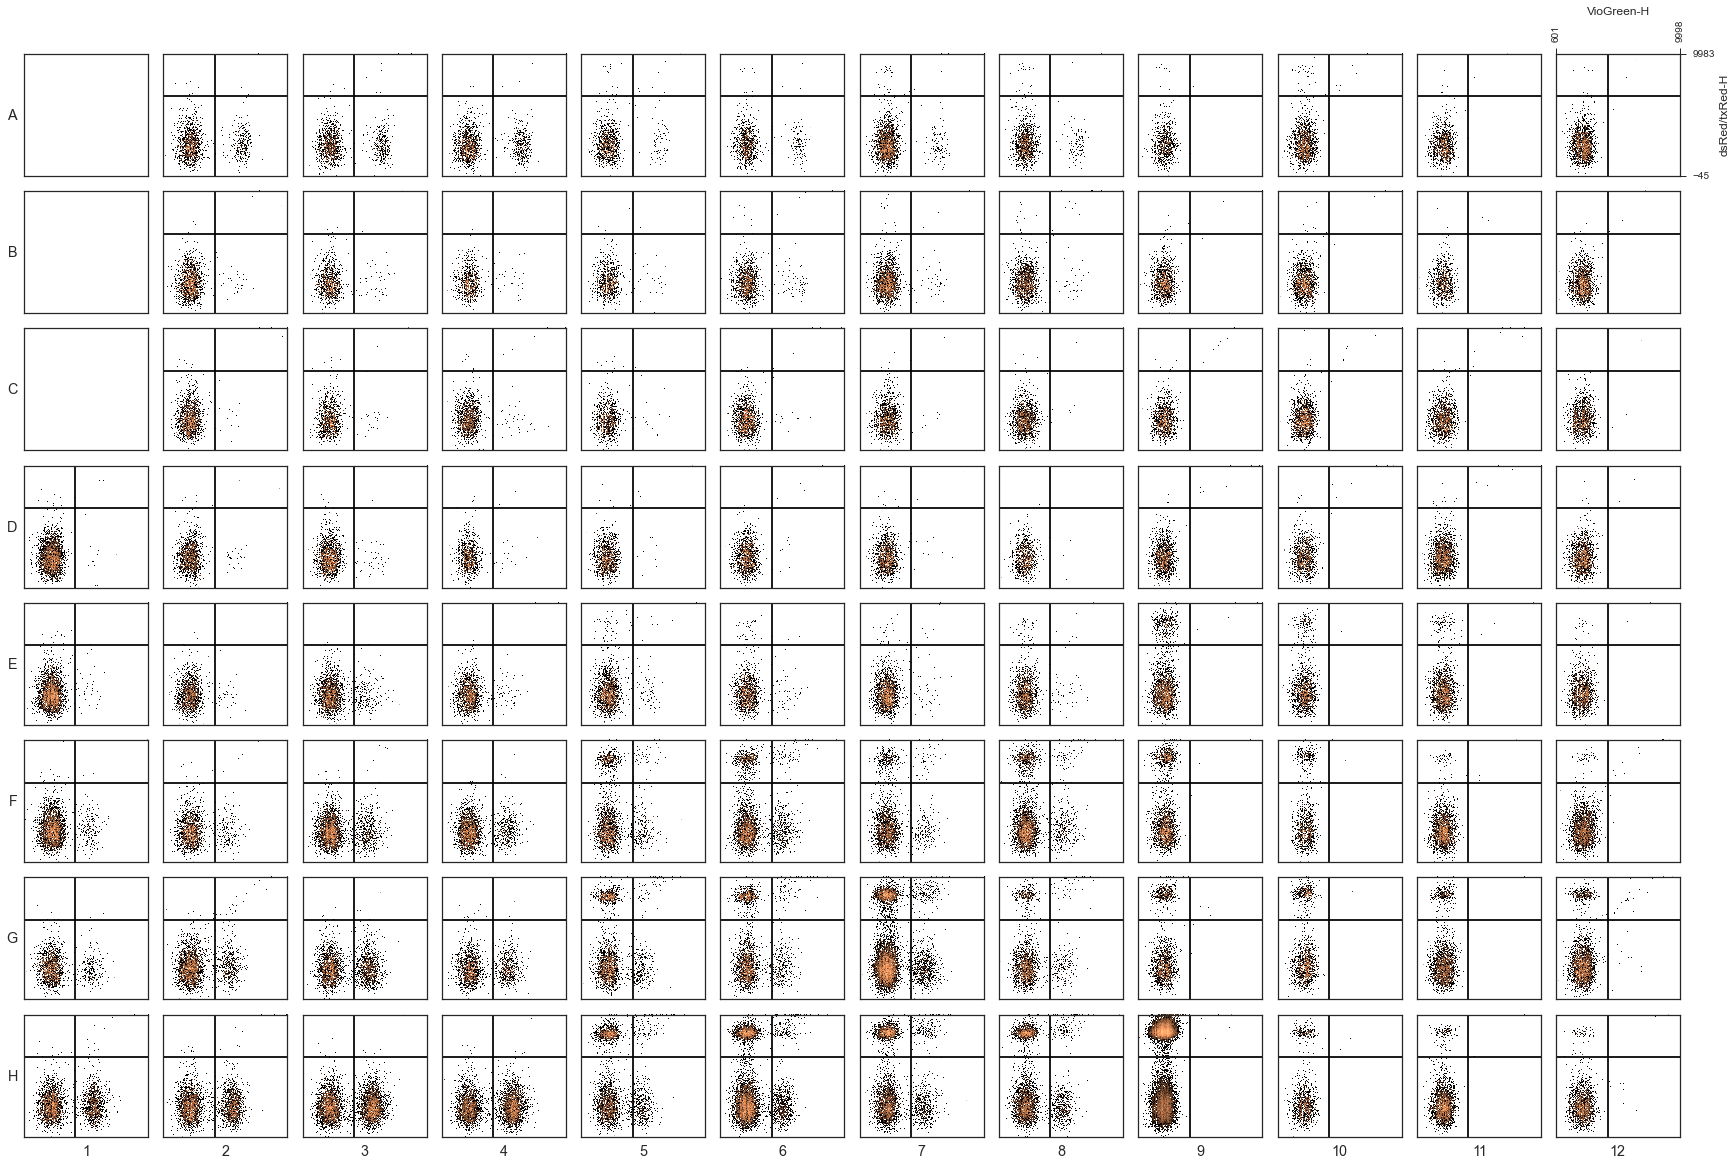

In [26]:
width = 24
height = int(width * 8/12.)

main_ax, ax = plate.plot([green, red], gates=[green_gate, red_gate], gate_colors='k')#, cmap="BuGn")
fig = main_ax.figure
fig.set_size_inches(width, height)
fig.tight_layout()

In [27]:
green_count = plate.gate(green_gate).counts()
green_count

,1,2,3,4,5,6,7,8,9,10,11,12
A,NaN,848,964,914,260,462,263,290,2,4,2,2
B,NaN,98,138,133,87,133,103,89,1,5,1,2
C,NaN,37,60,74,43,40,29,24,2,1,3,24
D,49,73,88,55,28,15,24,9,1,1,2,11
E,72,95,875,137,180,223,129,153,1,1,0,1
F,436,594,1310,1069,685,1061,604,778,2,1,3,7
G,863,1139,3728,2418,817,795,1634,514,2,0,1,24
H,2622,3087,7345,7055,1304,1994,1418,1254,6,0,2,21


In [28]:
red_count = plate.gate(red_gate).counts()
red_count

,1,2,3,4,5,6,7,8,9,10,11,12
A,NaN,14,11,11,50,50,62,46,42,82,16,38
B,NaN,12,13,13,13,18,21,16,15,13,7,8
C,NaN,17,14,13,13,8,18,10,13,12,9,12
D,30,15,9,9,11,7,11,11,12,17,25,13
E,22,8,16,16,125,123,66,156,764,574,278,83
F,28,19,18,11,1178,1325,908,1411,1750,948,197,125
G,14,17,11,15,1585,1809,3591,848,1336,1580,778,879
H,19,17,16,22,2936,3934,3528,2622,31211,818,396,170


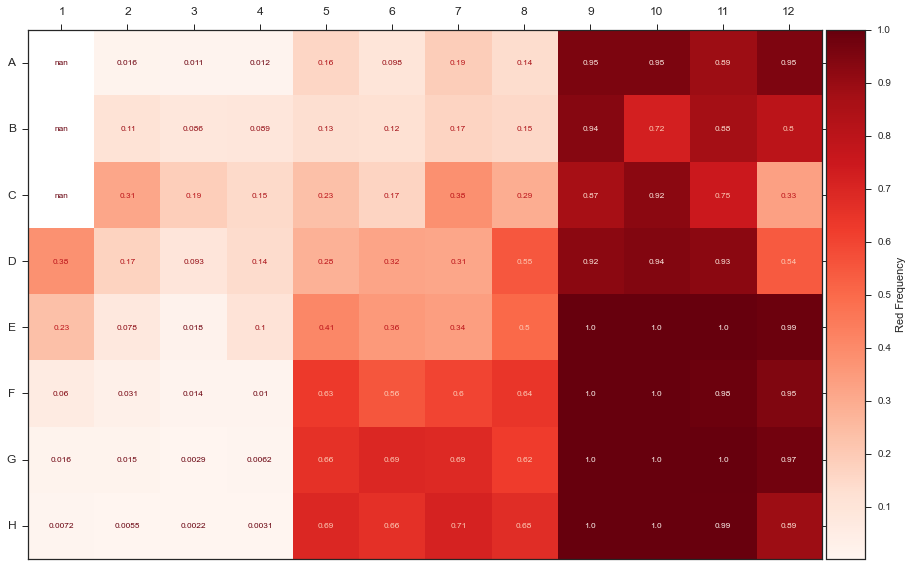

In [29]:
red_percent = red_count / (green_count + red_count)

fig,ax = plt.subplots(1,1,figsize=(15, 15*8./12))
ax = plot_heat_map(red_percent, include_values=True, show_colorbar=True, cmap="Reds")
ax.colorbar.set_label('Red Frequency');

## Time series

In [30]:
red_percent['Row'] = red_percent.index
red_percent.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Row
A,NaN,0.016241,0.011282,0.011892,0.161290,0.097656,0.190769,0.136905,0.954545,0.953488,0.888889,0.950000,A
B,NaN,0.109091,0.086093,0.089041,0.130000,0.119205,0.169355,0.152381,0.937500,0.722222,0.875000,0.800000,B
C,NaN,0.314815,0.189189,0.149425,0.232143,0.166667,0.382979,0.294118,0.866667,0.923077,0.750000,0.333333,C
D,0.379747,0.170455,0.092784,0.140625,0.282051,0.318182,0.314286,0.550000,0.923077,0.944444,0.925926,0.541667,D
E,0.234043,0.077670,0.017957,0.104575,0.409836,0.355491,0.338462,0.504854,0.998693,0.998261,1.000000,0.988095,E


In [31]:
df = pd.melt(red_percent, id_vars='Row', var_name='Col', value_name='RedPercent')
df.loc[df.Col.isin([1,2,3,4]),'Well'] = 'Green'
df.loc[df.Col.isin([5,6,7,8]),'Well'] = 'Both'
df.loc[df.Col.isin([9,10,11,12]),'Well'] = 'Red'
df['Time'] = map(lambda x: ord(x)-ord('A'), df.Row)
df.head()

,Row,Col,RedPercent,Well,Time
0,A,1,NaN,Green,0
1,B,1,NaN,Green,1
2,C,1,NaN,Green,2
3,D,1,0.379747,Green,3
4,E,1,0.234043,Green,4


D:\workspace\curveball_project\python\venv\lib\site-packages\numpy\lib\nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


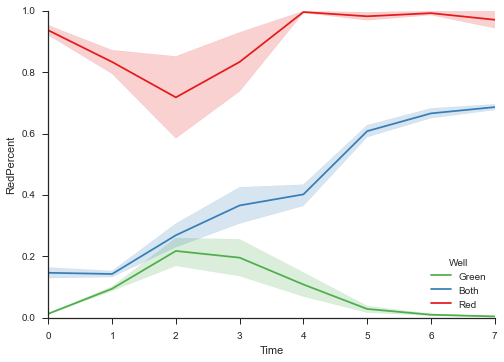

In [32]:
_red,_blue,_green = sns.color_palette('Set1',3)
sns.tsplot(df, 'Time', 'Col', 'Well', 'RedPercent', color={'Red':_red,'Green':_green,'Both':_blue}, estimator=np.nanmean)
sns.despine()

In [33]:
df.to_csv(os.path.join(datadir, 'flow_analysis.csv'), index=0)

## Dead count

In [45]:
dead_gate = FlowCytometryTools.core.gates.QuadGate([green_th, red_th], [green, red], 'bottom left', 'dead')
dead_gate

Gate Type: <class 'FlowCytometryTools.core.gates.QuadGate'>
               	Vertices: [4500, 6500]
               	Channel(s): ['VioGreen-H', 'dsRed/txRed-H']
               	Name: dead
                

In [46]:
dead_count = plate.gate(dead_gate).counts()
dead_count

,1,2,3,4,5,6,7,8,9,10,11,12
A,NaN,3599,3045,2856,2940,3027,4489,3413,2994,3570,4068,6882
B,NaN,3847,3126,2852,2881,3099,4925,3453,2825,3218,2855,5963
C,NaN,3898,3236,3116,3181,3105,4500,3379,3136,3526,3746,5704
D,9301,4278,3666,3379,3254,3206,4390,3283,2937,2921,4794,4712
E,6502,3790,7234,4036,4107,4628,5264,4716,4410,4448,4118,5259
F,6349,5221,6201,5387,4711,5336,5811,5759,4509,3851,6170,5648
G,5432,5055,5894,4933,4154,4287,10942,4243,3966,4401,5743,6170
H,4760,4567,7313,5931,4908,10405,5700,5237,18656,3538,6417,5137


In [47]:
dead_count['Row'] = dead_count.index
dead_count.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Row
A,NaN,3599,3045,2856,2940,3027,4489,3413,2994,3570,4068,6882,A
B,NaN,3847,3126,2852,2881,3099,4925,3453,2825,3218,2855,5963,B
C,NaN,3898,3236,3116,3181,3105,4500,3379,3136,3526,3746,5704,C
D,9301,4278,3666,3379,3254,3206,4390,3283,2937,2921,4794,4712,D
E,6502,3790,7234,4036,4107,4628,5264,4716,4410,4448,4118,5259,E


In [48]:
df = pd.melt(dead_count, id_vars='Row', var_name='Col', value_name='Dead')
df.loc[df.Col.isin([1,2,3,4]),'Well'] = 'Green'
df.loc[df.Col.isin([5,6,7,8]),'Well'] = 'Both'
df.loc[df.Col.isin([9,10,11,12]),'Well'] = 'Red'
df['Time'] = map(lambda x: ord(x)-ord('A'), df.Row)
df.head()

,Row,Col,Dead,Well,Time
0,A,1,NaN,Green,0
1,B,1,NaN,Green,1
2,C,1,NaN,Green,2
3,D,1,9301,Green,3
4,E,1,6502,Green,4


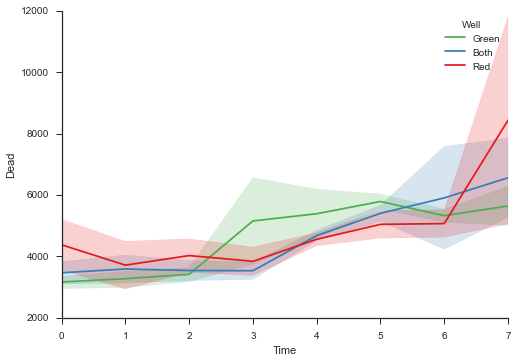

In [49]:
_red,_blue,_green = sns.color_palette('Set1',3)
sns.tsplot(df, 'Time', 'Col', 'Well', 'Dead', color={'Red':_red,'Green':_green,'Both':_blue}, estimator=np.nanmean)
sns.despine()